In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import multilabel_confusion_matrix, precision_score,recall_score, accuracy_score,ConfusionMatrixDisplay

In [2]:
#procesamiento de datos
df=pd.read_csv("./Datos.csv")
df=df.drop(columns=["Unnamed: 0.1"]) 
df=pd.concat([df.loc[df["Unnamed: 0"]>=100,:]],ignore_index=True)
df=df.drop(columns=["Unnamed: 0","Thumb","Index","Middle","Ring","Pinkie"]) 

In [3]:
train_data, test_data = train_test_split(df, train_size=0.7, random_state=20, stratify=df["Gesto"])
test_data, dev_data = train_test_split(test_data, train_size=(2/3), random_state=20, stratify=test_data["Gesto"])
print("distribucion de gestos set entrenamiento:")
print(train_data["Gesto"].value_counts())
print("distribucion de gestos set test:")
print(test_data["Gesto"].value_counts())
print("distribucion de gestos set dev:")
print(dev_data["Gesto"].value_counts())


distribucion de gestos set entrenamiento:
5.0    3189
1.0    3189
3.0    3183
6.0    3179
2.0    3179
7.0    3175
4.0    3161
Name: Gesto, dtype: int64
distribucion de gestos set test:
5.0    911
1.0    910
2.0    909
3.0    909
6.0    909
7.0    907
4.0    903
Name: Gesto, dtype: int64
distribucion de gestos set dev:
1.0    456
3.0    455
5.0    455
7.0    454
2.0    454
6.0    454
4.0    452
Name: Gesto, dtype: int64


           emg1      emg2      emg3      emg4      emg5      emg6      emg7  \
emg1   1.000000  0.501107  0.150992  0.196391  0.355078  0.234085  0.184778   
emg2   0.501107  1.000000  0.686792  0.291462  0.401946  0.313144  0.557071   
emg3   0.150992  0.686792  1.000000  0.492758  0.284876  0.222028  0.437984   
emg4   0.196391  0.291462  0.492758  1.000000  0.538475  0.232061  0.296831   
emg5   0.355078  0.401946  0.284876  0.538475  1.000000  0.679161  0.485539   
emg6   0.234085  0.313144  0.222028  0.232061  0.679161  1.000000  0.607674   
emg7   0.184778  0.557071  0.437984  0.296831  0.485539  0.607674  1.000000   
emg8   0.356567  0.456480  0.426928  0.295641  0.388233  0.402927  0.681210   
Gesto -0.077413 -0.256517 -0.325374 -0.124213 -0.046020  0.015130 -0.164425   

           emg8     Gesto  
emg1   0.356567 -0.077413  
emg2   0.456480 -0.256517  
emg3   0.426928 -0.325374  
emg4   0.295641 -0.124213  
emg5   0.388233 -0.046020  
emg6   0.402927  0.015130  
emg7   0.6812

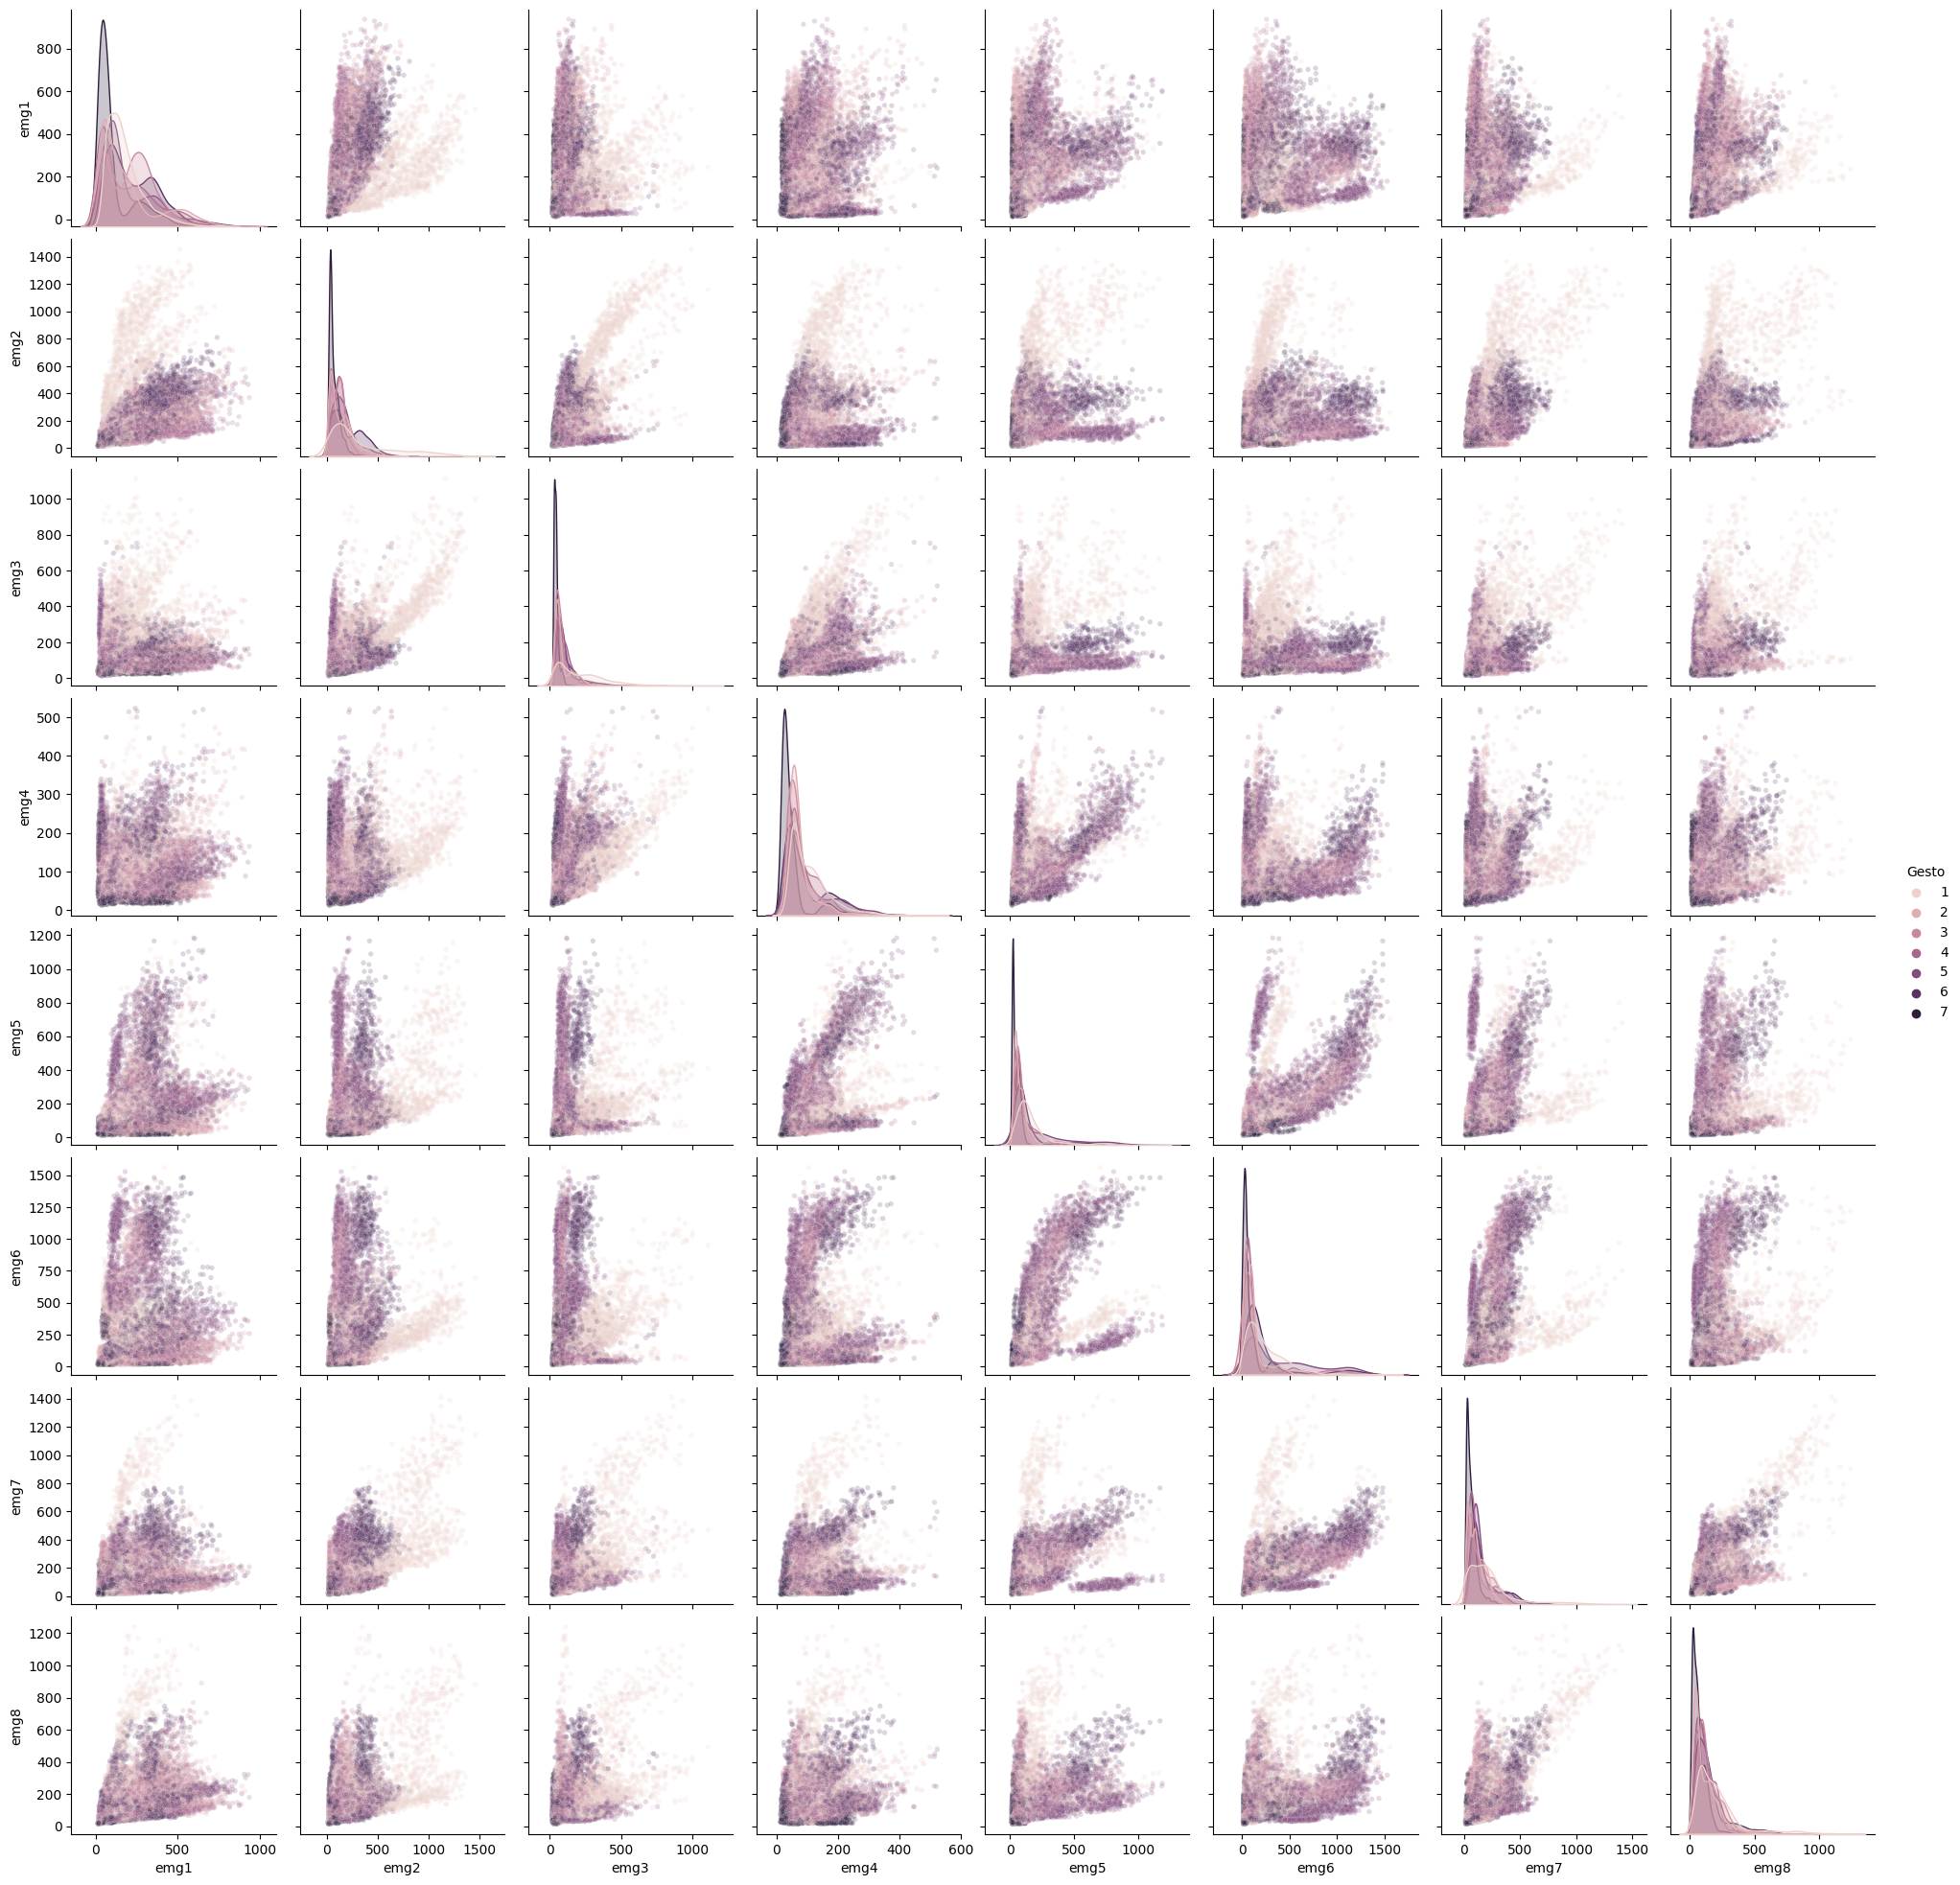

In [4]:
#%% Matriz de correlacion
sns.pairplot(train_data, hue='Gesto',plot_kws = {'alpha': 0.2, 's': 15})
corr_matrix = train_data.corr()
print(corr_matrix)

In [5]:
Sensor_tr=train_data.drop(["Gesto"],axis=1)
x_max=Sensor_tr.max()
x_min=Sensor_tr.min()
Sensor_tr=(Sensor_tr-x_min)/(x_max-x_min)
Gesto_t=train_data["Gesto"].copy()
Sensor_ts=test_data.drop(["Gesto"],axis=1)
Sensor_ts=(Sensor_ts-x_min)/(x_max-x_min)
Gesto_s=test_data["Gesto"].copy()
def dedo(n):
    return lambda x: (x==n or x==1)*1
a=dedo(2)
b=dedo(3)
c=dedo(4)
d=dedo(5)
e=dedo(6)
Gesto_tr=pd.DataFrame([])
Gesto_ts=pd.DataFrame([])
Gesto_tr["pul"]=Gesto_t.transform([a])
Gesto_tr["ind"]=Gesto_t.transform([b])
Gesto_tr["mid"]=Gesto_t.transform([c])
Gesto_tr["anl"]=Gesto_t.transform([d])
Gesto_tr["pin"]=Gesto_t.transform([e])
Gesto_ts["pul"]=Gesto_s.transform([a])
Gesto_ts["ind"]=Gesto_s.transform([b])
Gesto_ts["mid"]=Gesto_s.transform([c])
Gesto_ts["anl"]=Gesto_s.transform([d])
Gesto_ts["pin"]=Gesto_s.transform([e])


c:\Users\DAVID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DAVID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DAVID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DAVID\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Acurracy MLP: 0.769267065114816
Acurracy RF: 0.35561497326203206


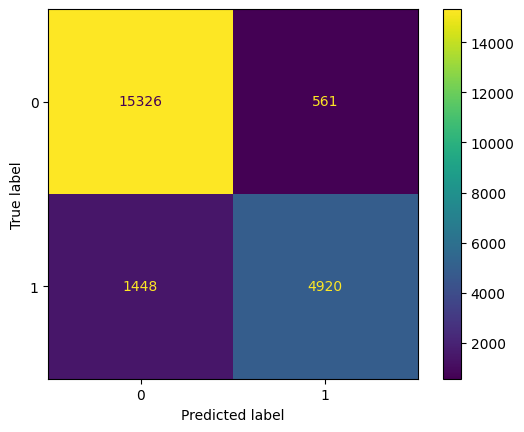

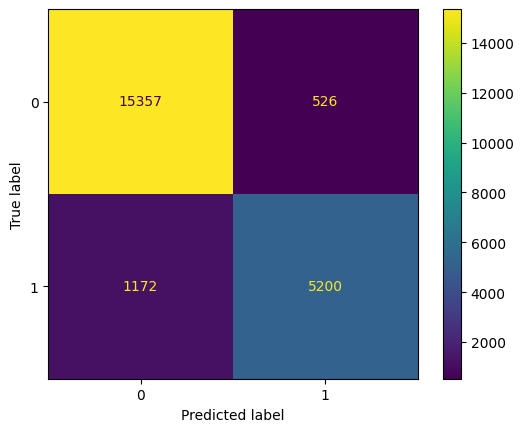

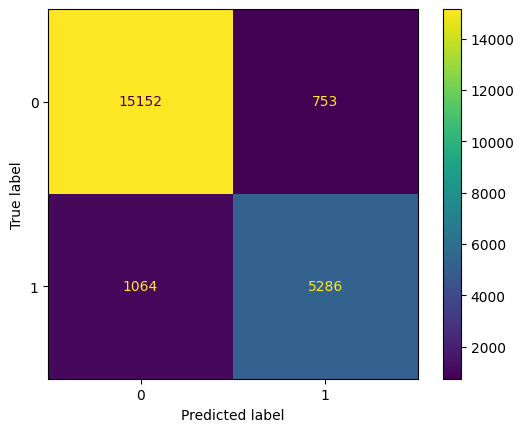

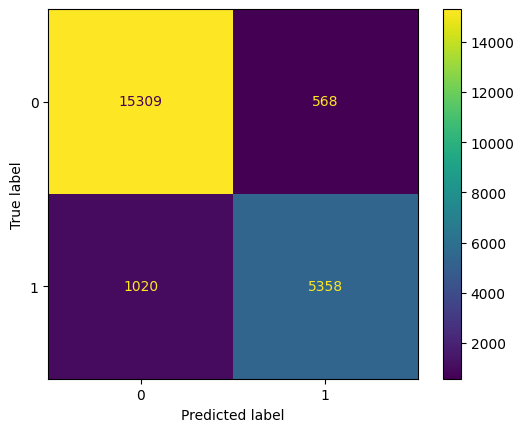

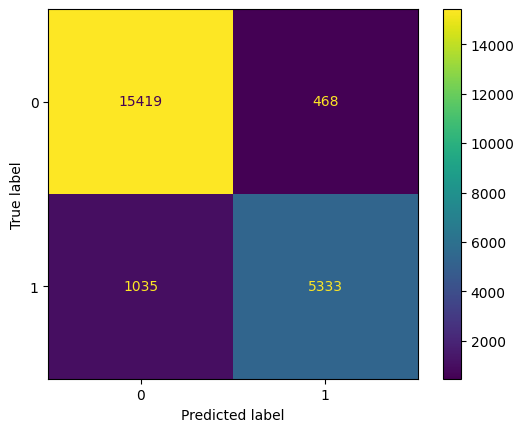

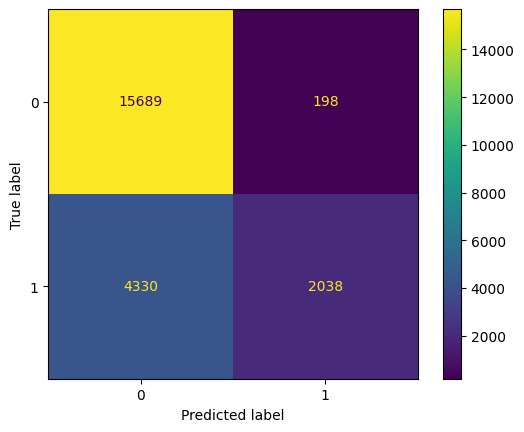

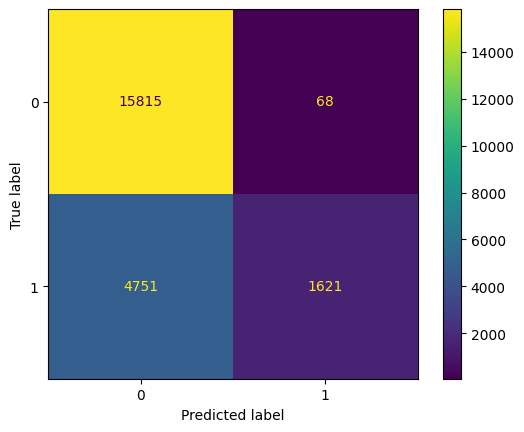

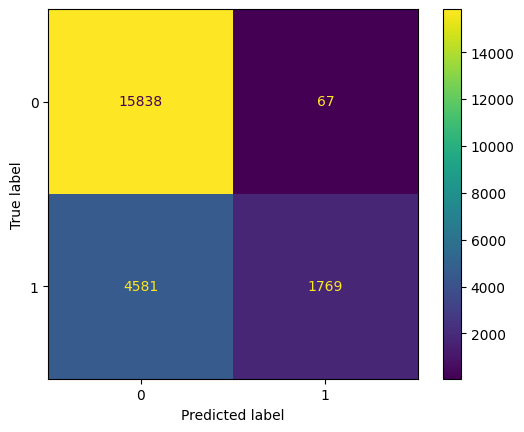

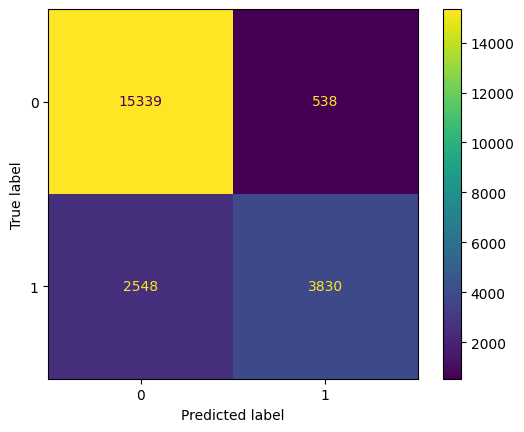

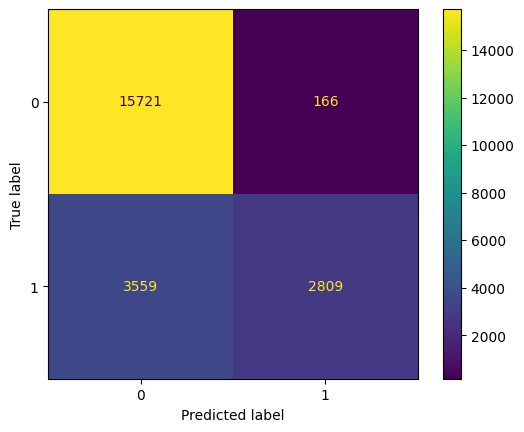

In [6]:

MLP=MultiOutputClassifier(MLPClassifier(random_state=1,hidden_layer_sizes=100))
Gesto_cv_MLP=cross_val_predict(MLP,Sensor_tr,Gesto_tr,cv=5)
MLP.fit(Sensor_tr,Gesto_tr)
MLP_cm = multilabel_confusion_matrix(Gesto_tr,Gesto_cv_MLP)

for i in range(5):
    disp2 = ConfusionMatrixDisplay(confusion_matrix=MLP_cm[i,:,:])
    disp2.plot()
print(f"Acurracy MLP: {MLP.score(Sensor_ts,Gesto_ts)}")

RF= MultiOutputClassifier(RandomForestClassifier(max_depth=5))
Gesto_cv_RF=cross_val_predict(RF,Sensor_tr,Gesto_tr,cv=5)
RF.fit(Sensor_tr,Gesto_tr)
RF_cm = multilabel_confusion_matrix(Gesto_tr,Gesto_cv_RF)
for i in range(5):
    disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm[i,:,:])
    disp.plot()
print(f"Acurracy RF: {RF.score(Sensor_ts,Gesto_ts)}")


In [7]:
from joblib import dump
print(f"Acurracy MLP: {MLP.score(Sensor_tr,Gesto_tr)}")
print(f"Acurracy RF: {RF.score(Sensor_tr,Gesto_tr)}")
dump(MLP,"./Models/Multiclass_minmax.joblib")

Acurracy MLP: 0.7707481464839362
Acurracy RF: 0.3623904740507751


['./Models/Multiclass_minmax.joblib']